In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Need additional librairies : 
* geopandas : https://geopandas.org/install.html
* descartes : https://docs.descarteslabs.com/installation.html

The following was heavily inspired from this tutorial : https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Additional data for the map creation : https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

In [9]:
map_wards = gpd.read_file("data\London-wards-2018_ESRI")
geo = pd.read_csv("data/london_pcd2geo_2015.csv")
map_bouroughs = gpd.read_file('data\statistical-gis-boundaries-london\ESRI')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_bouroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

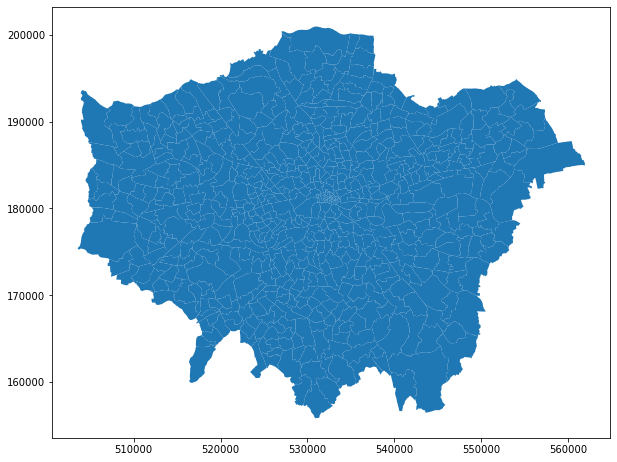

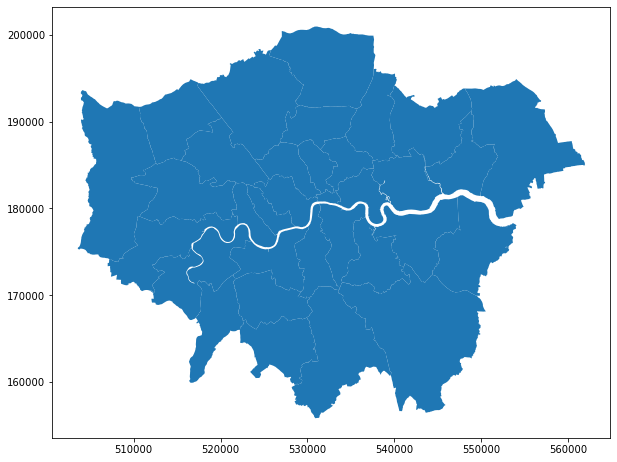

In [10]:
map_wards.plot(figsize=(10,10))
map_bouroughs.plot(figsize=(10,10))

In [11]:
# let's import the data:

final = pd.read_csv('ALDI_standardize.csv')
final

,area_id,Names,Housing,Safety,Income,Life_Satisfaction,Civic,Work_Life_Balance,Jobs,Community,Education,Environment,Health,Foods,final
0,E05000029,Chadwell Heath,-0.042505,0.076969,-0.757899,-1.745599,-0.085885,1.440875,-0.686894,0.718378,-1.940717,0.292055,-1.166149,-0.503091,0.285374
1,E05000042,Whalebone,-0.680690,0.161172,-0.276057,0.220689,0.341079,0.136233,0.089308,0.514797,-0.813000,-1.624471,0.390465,-0.648404,0.340118
2,E05000030,Eastbrook,-0.098329,0.471456,-0.243540,0.876118,0.158095,-1.471879,-0.520268,1.194186,-1.171024,1.086405,-1.164620,-0.290346,0.403877
3,E05000034,Heath,-0.451278,-0.353831,-1.139234,-0.434740,-0.467103,1.964195,-1.176855,0.889719,-1.311358,-0.748773,-1.717460,-1.747320,0.245873
4,E05000040,Valence,-0.900563,0.426237,-0.864318,-0.434740,-0.695834,1.440875,-0.320117,0.779516,-1.726733,-1.274307,-2.056807,-0.228593,0.249228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,E05000295,Kenton West,-0.311463,1.321542,-0.095736,-0.107026,0.630805,-0.725255,0.880879,-0.349154,0.289931,-0.545926,0.679878,-1.446532,0.441671
628,E05011241,Cranbrook,-0.162621,-0.089504,-0.111994,0.876118,0.188592,0.933908,0.146522,-0.188478,1.357214,0.336138,-0.299948,-0.830096,0.510406
629,E05011239,Clayhall,0.094876,0.054017,0.355068,0.876118,0.996775,-0.033937,0.716522,0.132388,-0.415546,-0.461290,0.603958,-1.313472,0.445872
630,E05000222,Greenwich West,0.449492,-1.090782,0.476267,1.203833,0.158095,0.476575,-0.161790,0.003159,-0.684503,1.126034,0.256459,-0.615234,0.432301


In [12]:
# Let's merge the two datasets
merged_wards = map_wards.set_index('GSS_CODE').join(final.set_index('area_id'))
merged_wards.head(3)

,NAME,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,Names,Housing,Safety,Income,Life_Satisfaction,Civic,Work_Life_Balance,Jobs,Community,Education,Environment,Health,Foods,final
GSS_CODE,,,,,,,,,,,,,,,,,,,,
E05000405,Chessington South,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",Chessington South,0.743128,1.101977,-0.109038,0.220689,0.935780,0.136233,1.379203,1.613205,0.228224,2.327839,1.019225,-1.229418,0.634206
E05000414,Tolworth and Hook Rise,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",Tolworth and Hook Rise,0.094244,0.806609,-0.178506,-0.434740,1.012023,-1.074981,1.346339,0.740558,-0.484719,0.194057,0.926491,0.665299,0.487595
E05000401,Berrylands,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",Berrylands,0.103026,1.357049,0.485135,0.876118,1.423739,-0.266802,1.130302,1.018329,0.900434,0.123255,0.189710,0.266817,0.652841


<AxesSubplot:>

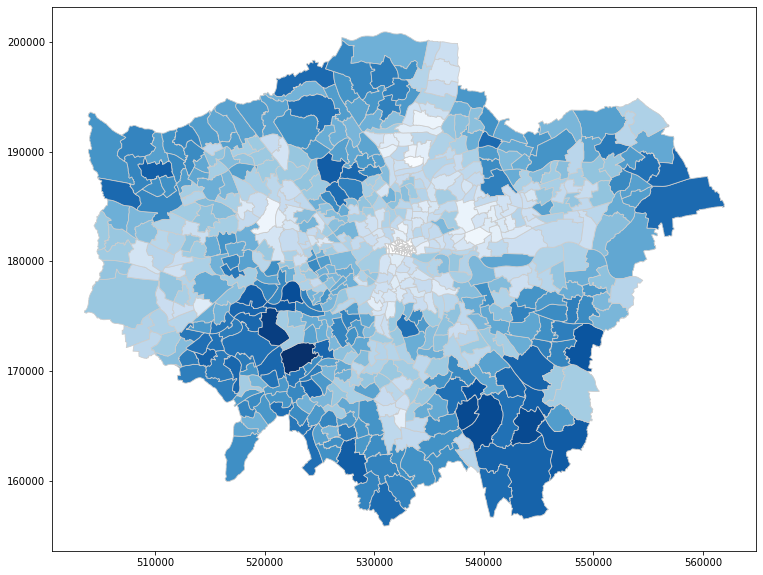

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_wards.plot(column='final', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


<AxesSubplot:>

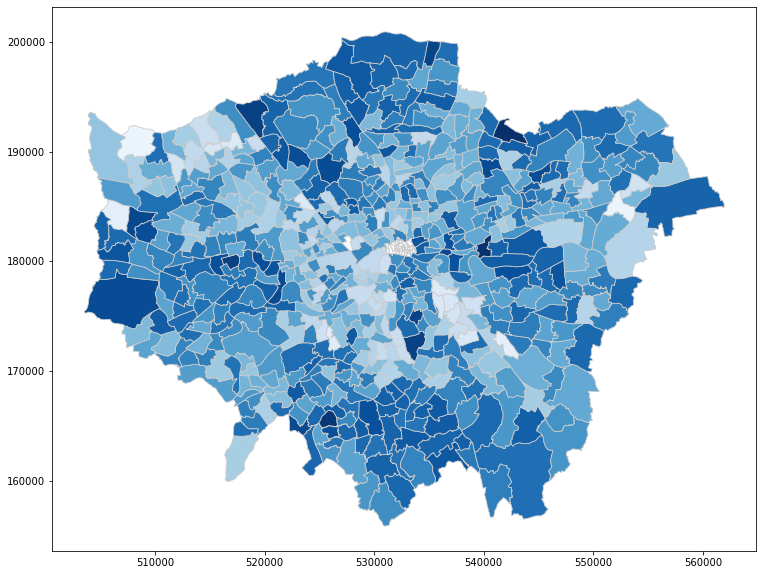

In [16]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_wards.plot(column='Foods', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


In [18]:
geo = geo[['oslaua','osward']].drop_duplicates() 
merged_bouroughs = map_bouroughs.merge(geo, right_on = 'oslaua',left_on = 'GSS_CODE')
merged_bouroughs = merged_bouroughs.merge(final.loc[:,['area_id','final']],left_on = 'osward', right_on = 'area_id')

In [19]:
merged_bouroughs.head(3)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,oslaua,osward,area_id,final
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000408,E05000408,0.358334
1,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000402,E05000402,0.595789
2,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000403,E05000403,0.613227


0      Text(519297.6348074289, 166820.01149016235, 'K...
1      Text(519297.6348074289, 166820.01149016235, 'K...
2      Text(519297.6348074289, 166820.01149016235, 'K...
3      Text(519297.6348074289, 166820.01149016235, 'K...
4      Text(519297.6348074289, 166820.01149016235, 'K...
                             ...                        
627    Text(548040.1222768395, 185087.7901945672, 'Ba...
628    Text(548040.1222768395, 185087.7901945672, 'Ba...
629    Text(548040.1222768395, 185087.7901945672, 'Ba...
630    Text(548040.1222768395, 185087.7901945672, 'Ba...
631    Text(548040.1222768395, 185087.7901945672, 'Ba...
Length: 632, dtype: object

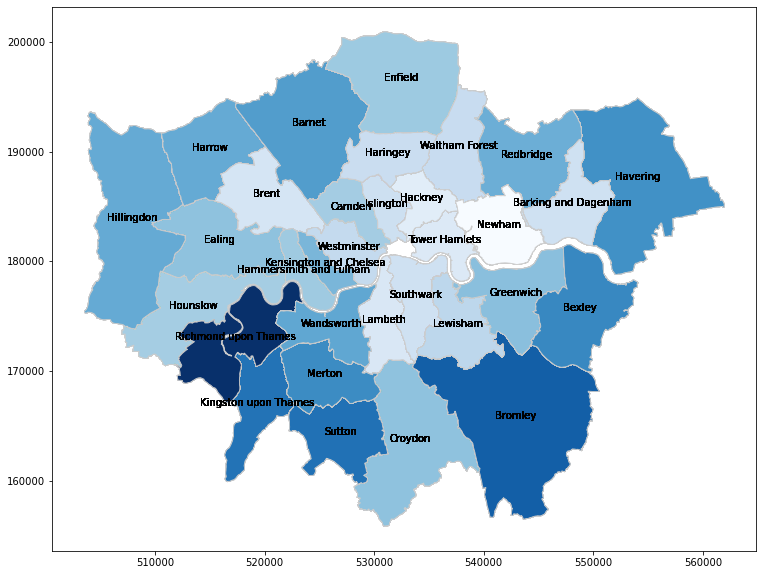

In [45]:
merged_bouroughs.final = merged_bouroughs.apply(lambda x : np.sum(merged_bouroughs[x.GSS_CODE == merged_bouroughs.GSS_CODE].final) 
                                               / np.sum([x.GSS_CODE == merged_bouroughs.GSS_CODE]), axis =1)


fig, ax = plt.subplots(1, figsize=(15, 10))
merged_bouroughs.plot(column='final', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged_bouroughs.apply(lambda x: ax.text(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1],s=x.NAME,ha='center', fontsize=10), axis = 1)


In [35]:
merged_bouroughs.geometry.iloc[0].centroid.coords[0][0]

519297.6348074289

![alt text](data\super_accurate_validation_data.jpg "Title")